In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def find_histogram(clt): #function to limit the number of histograms to the desired number of clusters.
    
    """
    create a histogram with k clusters
    :param: clt
    :return:hist
    """
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()

    return hist


In [3]:
def plot_colors2(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

In [4]:
img = cv2.imread("C:/Users/Aditya/Documents/Internship Assessment/HelloSivi/Finding Dominant Color Hexcode/1.jpeg")


In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [6]:
img = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number
clt = KMeans(n_clusters=3) #cluster number
clt.fit(img)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[0.33956156 0.5543964  0.10604204]


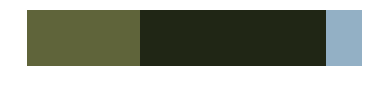

In [10]:
hist = find_histogram(clt)
bar = plot_colors2(hist, clt.cluster_centers_)
print(hist)
fig = plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()
fig.savefig('plot.png')

In [8]:
from PIL import Image
from colormap import rgb2hex

im = Image.open('plot.png', 'r')
pix_val = list(im.getdata())

pix_val_set =list(set(pix_val))
for i in pix_val_set:
    print(rgb2hex(i[0], i[1], i[2]))

#93B0C5
#5F643A
#202615
#FFFFFF


In [9]:
#!pip install easydev